In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 2.17MB/s]


In [2]:
import zipfile

with zipfile.ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
len(df)

1460

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Baseline score

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

baseline_features = ["LotArea", "YearBuilt", "GrLivArea"]


def get_score_with_linear_regression(df=df, features=None):
    if features is None:
        features = []
    if type(features) == str:
        features = [features]
    X = df[baseline_features + features].copy()
    y = df["SalePrice"]
    lin_model = LinearRegression()
    linear_scores = (-1 * cross_val_score(lin_model, X, y, cv=5, scoring="neg_root_mean_squared_error"))
    tree_model = DecisionTreeRegressor()
    tree_scores = (-1 * cross_val_score(tree_model, X, y, cv=5, scoring="neg_root_mean_squared_error"))
    print("Linear:", linear_scores)
    print("Tree:", tree_scores)
    return linear_scores.mean(), tree_scores.mean()


get_score_with_linear_regression()

Linear: [40691.48131764 46876.21615774 47230.38881576 41878.9943703
 54832.96074036]
Tree: [42627.06126157 59600.64594164 48678.75648541 40412.55295108
 50581.73479143]


(46302.00828035882, 48380.15028622666)

## EDA and Feature Engineering

In [188]:
def get_score_with_linear_regression_and_one_hot_encoding(feature, df=df):
    X = df[baseline_features + ["SalePrice"]]
    one_hot = pd.get_dummies(df[feature], prefix=feature)
    return get_score_with_linear_regression(X.join(one_hot), list(one_hot.columns))

### MSSubClass ✔

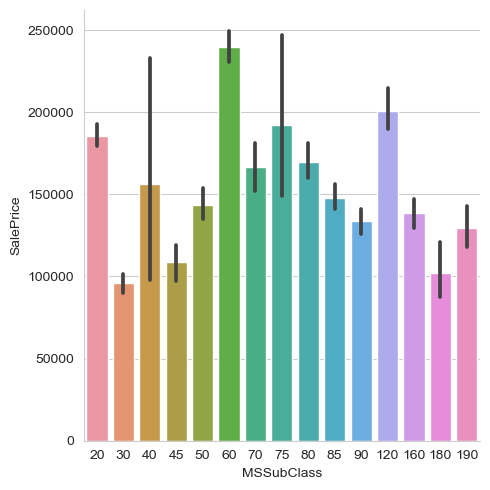

In [37]:
sns.catplot(df, x="MSSubClass", y="SalePrice", kind="bar")

In [38]:
get_score_with_linear_regression_and_one_hot_encoding("MSSubClass")

Linear: [37270.21029841 43757.99598602 43666.77709879 37098.10942065
 52152.11826797]
Tree: [41411.49761263 51082.18967987 42686.8660338  40174.75274161
 52284.49075651]


(42789.04221437061, 45527.95936488245)

### BldgType ✔

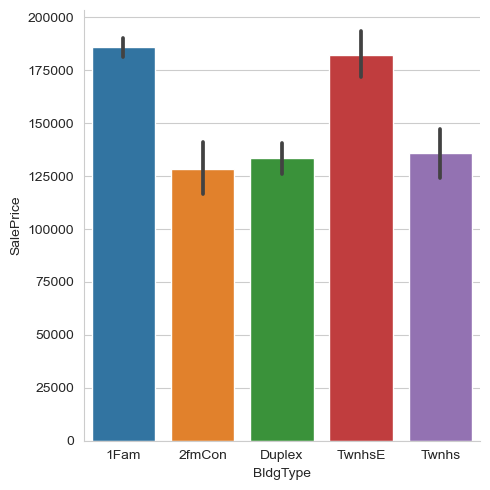

In [39]:
sns.catplot(df, x="BldgType", y="SalePrice", kind="bar")

In [40]:
get_score_with_linear_regression_and_one_hot_encoding("BldgType")

Linear: [39222.78302233 45881.45061081 46366.04245918 39325.93184761
 53150.27133617]
Tree: [43324.17148834 57341.83562209 45495.59000065 41205.62632833
 50884.41708616]


(44789.29585521939, 47650.32810511105)

### Neighborhood ✔

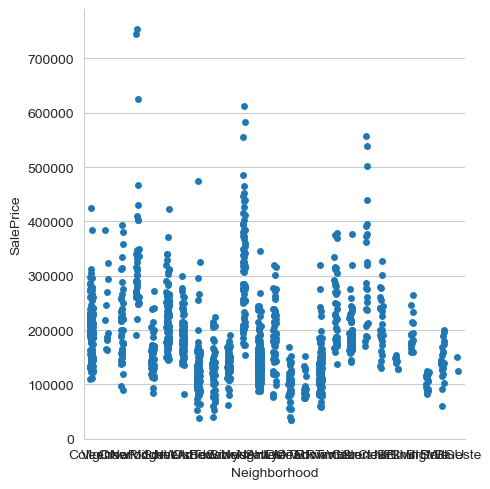

In [41]:
sns.catplot(df, x="Neighborhood", y="SalePrice")

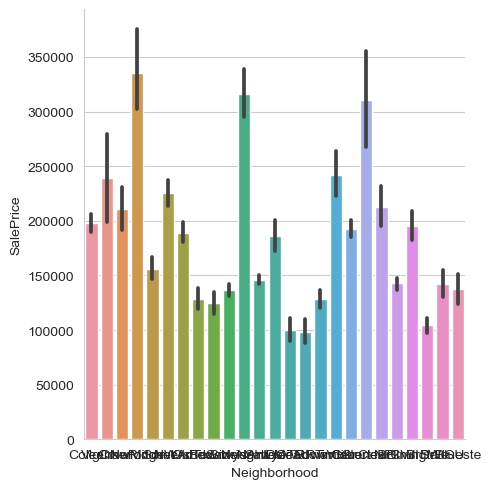

In [42]:
sns.catplot(df, x="Neighborhood", y="SalePrice", kind="bar")

In [43]:
get_score_with_linear_regression_and_one_hot_encoding("Neighborhood")

Linear: [32879.61815081 39812.56776639 42167.00819596 35838.57293126
 47709.6174301 ]
Tree: [39470.27727182 57391.00969434 52673.56596724 39190.38460039
 53680.22637624]


(39681.476894904496, 48481.09278200883)

### OverallQual ✔

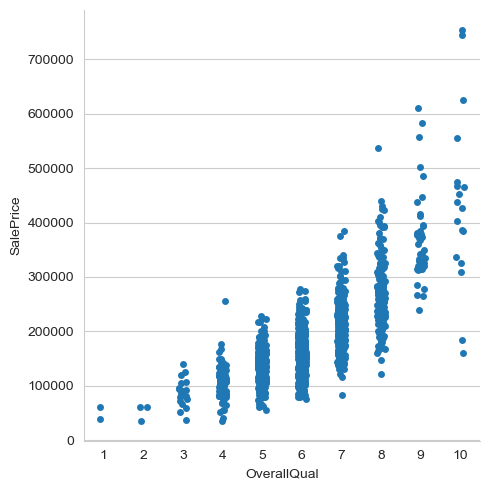

In [129]:
sns.catplot(df, x="OverallQual", y="SalePrice")

In [45]:
get_score_with_linear_regression_and_one_hot_encoding("OverallQual")

Linear: [29603.5752118  37881.11754985 37998.82177103 30993.27032807
 44817.34327131]
Tree: [44470.01849299 52147.53404367 38741.53853473 36944.99681804
 53651.6112585 ]


(36258.82562641216, 45191.13982958653)

### OverallCond ✔

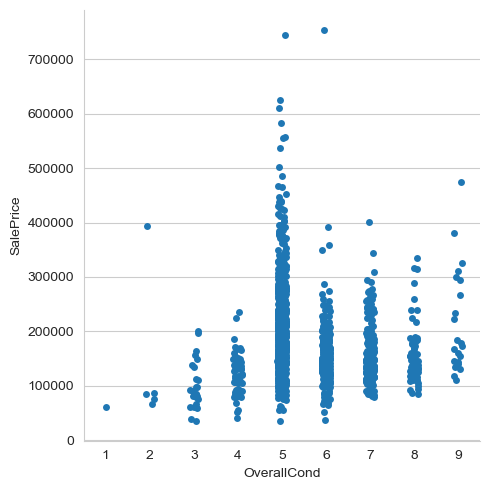

In [46]:
sns.catplot(df, x="OverallCond", y="SalePrice")

In [47]:
get_score_with_linear_regression_and_one_hot_encoding("OverallCond")

Linear: [39412.28287844 45496.80707982 46841.43438647 39824.62582709
 54025.10504331]
Tree: [41328.56063765 56683.8469452  48021.92960067 40009.80974869
 55437.27831829]


(45120.05104302721, 48296.28505010091)

### ExterQual ✔

In [48]:
df["ExterQual"].describe()

count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object

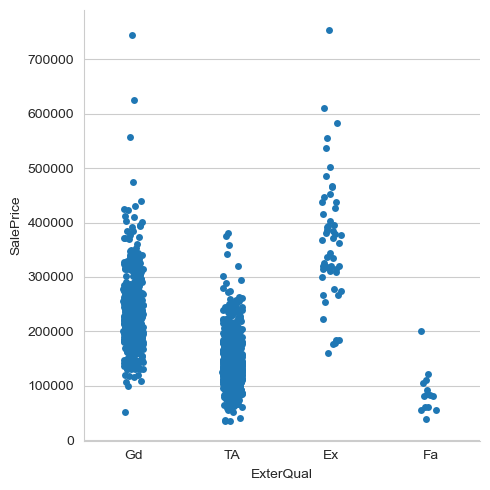

In [49]:
sns.catplot(df, x="ExterQual", y="SalePrice")

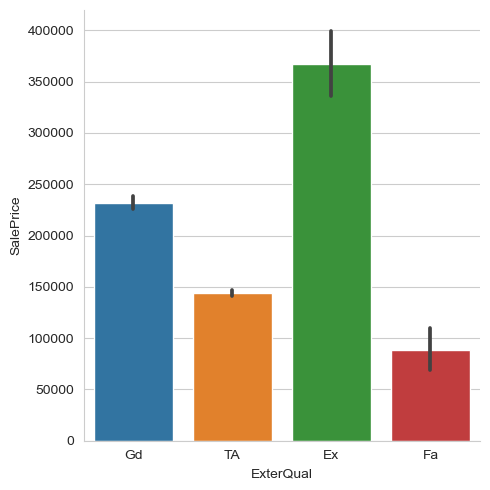

In [50]:
sns.catplot(df, x="ExterQual", y="SalePrice", kind="bar")

In [51]:
X = df.copy()
X["ExterQual"].replace({"Ex": 3, "Gd": 2, "TA": 1, "Fa": 0, "Po": -1}, inplace=True)
get_score_with_linear_regression(X, "ExterQual")

Linear: [36872.29712908 43585.50735855 42235.29943989 37556.90950018
 50590.42590412]
Tree: [45942.2368128  55621.31998678 48525.77122968 44620.0255119
 48625.73737825]


(42168.087866361966, 48667.01818388134)

### ExterCond

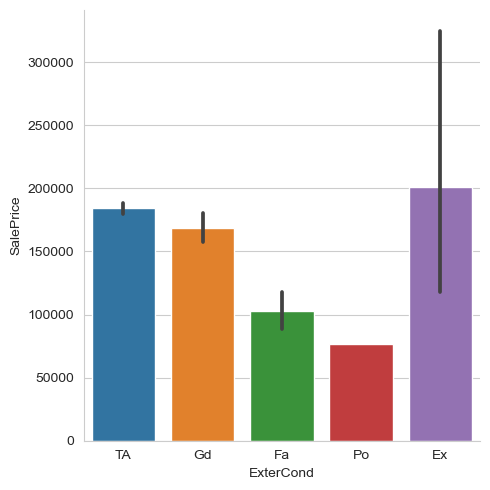

In [52]:
sns.catplot(df, x="ExterCond", y="SalePrice", kind="bar")

In [53]:
X = df.copy()
X["ExterCond"].replace({"Ex": 3, "Gd": 2, "TA": 1, "Fa": 1, "Po": -1}, inplace=True)
get_score_with_linear_regression(X, "ExterCond")

Linear: [40565.38870905 46661.65777156 47480.52849427 41592.78483842
 54668.25121376]
Tree: [44618.57226138 57999.97656264 50783.58826334 42794.43899493
 54508.36777536]


(46193.722205411446, 50140.98877153045)

### Foundation

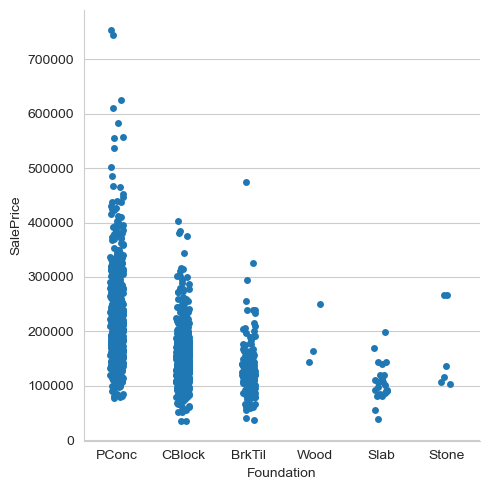

In [54]:
sns.catplot(df, x="Foundation", y="SalePrice")

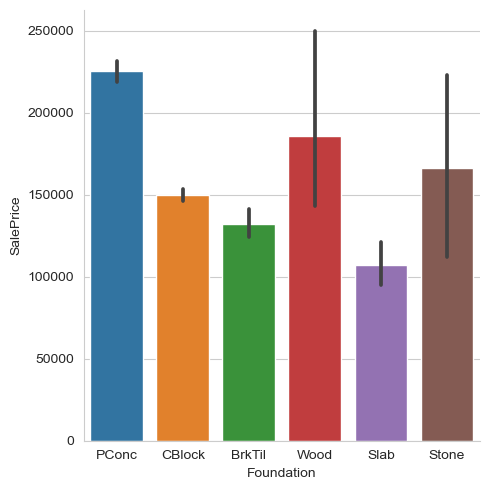

In [55]:
sns.catplot(df, x="Foundation", y="SalePrice", kind="bar")

In [56]:
get_score_with_linear_regression_and_one_hot_encoding("Foundation")

Linear: [40369.45160793 46535.48111477 46004.41119511 40435.59852122
 53941.25268518]
Tree: [41797.77384876 60005.8820096  46979.24244948 41175.05228765
 55005.95761034]


(45457.23902484293, 48992.78164116443)

### BsmtQual

In [57]:
df["BsmtQual"].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [58]:
X = df.copy()
X["BsmtQual"].fillna("NA", inplace=True)

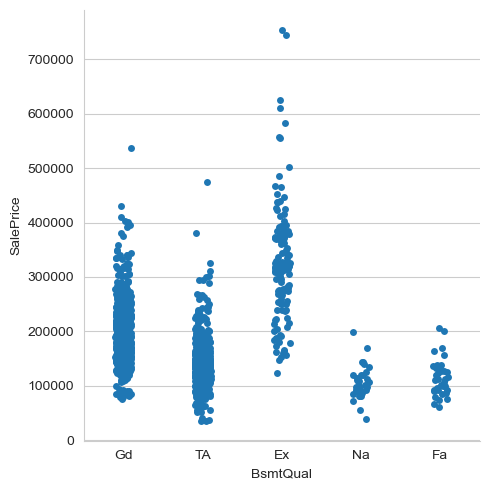

In [59]:
sns.catplot(X, x="BsmtQual", y="SalePrice")

In [60]:
X["BsmtQual_ordinal"] = X["BsmtQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})
get_score_with_linear_regression(X, "BsmtQual_ordinal")

Linear: [38600.90834456 45085.88283072 45314.1309819  38633.39663069
 52625.14212091]
Tree: [42667.01199465 54383.06185246 45699.62331598 49861.39474625
 60108.88592098]


(44051.89218175569, 50543.99556606364)

In [61]:
get_score_with_linear_regression_and_one_hot_encoding("BsmtQual")

Linear: [35128.34855173 43468.4526477  42705.0373315  34568.30120996
 49847.47337407]
Tree: [43914.83513482 55613.65018987 45179.84031775 48756.79693249
 56601.84432695]


(41143.522622993834, 50013.39338037642)

### BsmtCond ✔

In [62]:
df["BsmtCond"].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [64]:
X = df.copy()
X["BsmtCond"].fillna("NA", inplace=True)

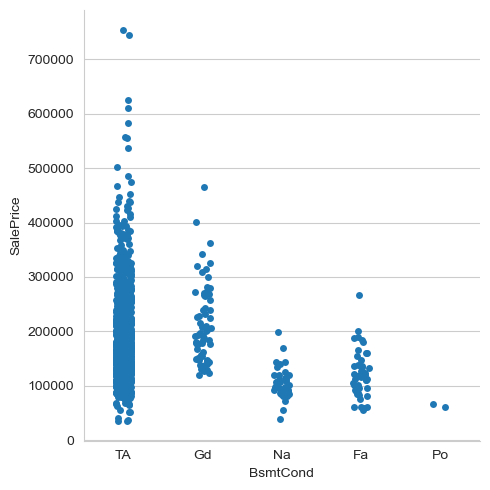

In [65]:
sns.catplot(X, x="BsmtCond", y="SalePrice")

In [66]:
X["BsmtCond_ordinal"] = X["BsmtCond"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})
get_score_with_linear_regression(X, "BsmtCond_ordinal")

Linear: [40114.5826684  46982.6412728  46642.3113314  40951.96174541
 54320.33016913]
Tree: [43900.97565284 56054.72878027 51979.09350719 40187.06286155
 54681.3477217 ]


(45802.36543742738, 49360.641704708876)

In [68]:
get_score_with_linear_regression_and_one_hot_encoding("BsmtCond")

Linear: [40122.5332619  47036.11645457 46661.58436755 41101.30920915
 54370.09297186]
Tree: [44984.86814349 59973.25669536 45950.3042004  40922.05461652
 53699.10866088]


(45858.32725300494, 49105.91846332955)

### BsmtQual & BsmtCond

In [77]:
X = df.copy()
X["BsmtQual"].fillna("NA", inplace=True)
X["BsmtCond"].fillna("NA", inplace=True)
X["BsmtQual_ordinal"] = X["BsmtQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})
X["BsmtCond_ordinal"] = X["BsmtCond"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})
X["Bsmt"] = X["BsmtQual_ordinal"] + X["BsmtCond_ordinal"]

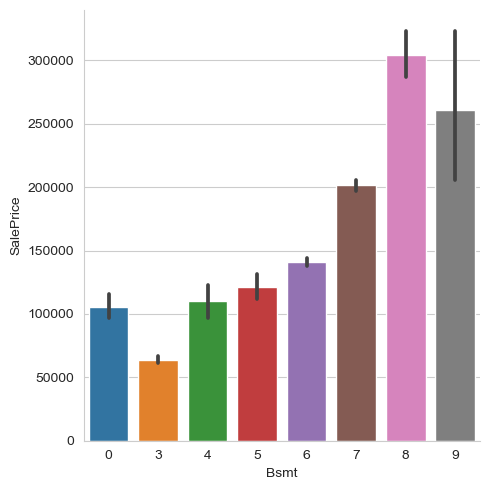

In [80]:
sns.catplot(X, x="Bsmt", y="SalePrice", kind="bar")

In [79]:
get_score_with_linear_regression(X, "Bsmt")

Linear: [39115.62079308 46046.37378204 45728.80314425 39570.54805056
 53230.78125852]
Tree: [42548.31730178 53456.07906682 47263.50743739 46237.49256026
 50032.44608515]


(44738.42540568777, 47907.568490281345)

In [81]:
X = df.copy()
X["BsmtQual"].fillna("NA", inplace=True)
X["BsmtCond"].fillna("NA", inplace=True)
X["BsmtQual_ordinal"] = X["BsmtQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})
X["BsmtCond_ordinal"] = X["BsmtCond"].replace({"Ex": 1, "Gd": 2, "TA": 3, "Fa": 4, "Po": 5, "NA": 6})
X["Bsmt"] = X["BsmtQual_ordinal"] / X["BsmtCond_ordinal"]

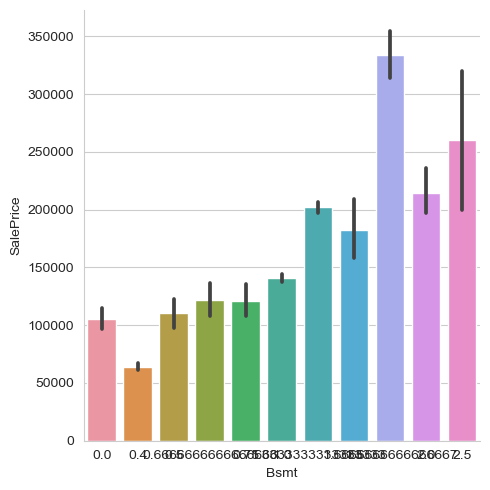

In [88]:
sns.catplot(X, x="Bsmt", y="SalePrice", kind="bar")

In [89]:
get_score_with_linear_regression(X, "Bsmt")

Linear: [38653.98081391 45607.92771605 45496.72895985 39775.67724169
 52605.17311932]
Tree: [42010.16105964 54801.10854874 49094.2136683  46636.49544334
 55572.797227  ]


(44427.89757016352, 49622.9551894058)

### BsmtExposure ✔

In [90]:
df["BsmtExposure"].describe()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

In [93]:
X = df.copy()
X["BsmtExposure"].fillna("NA", inplace=True)

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

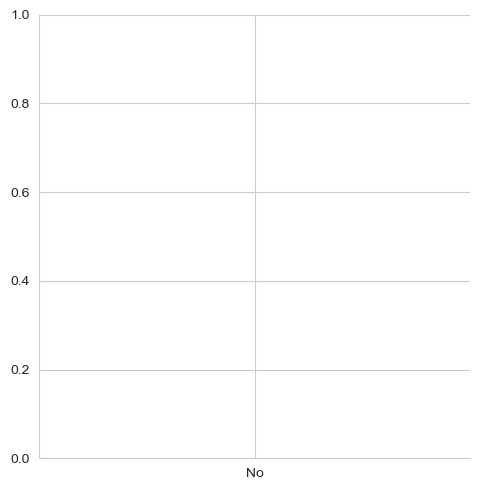

In [130]:
sns.catplot(X, x="BsmtExposure", y="SalePrice")

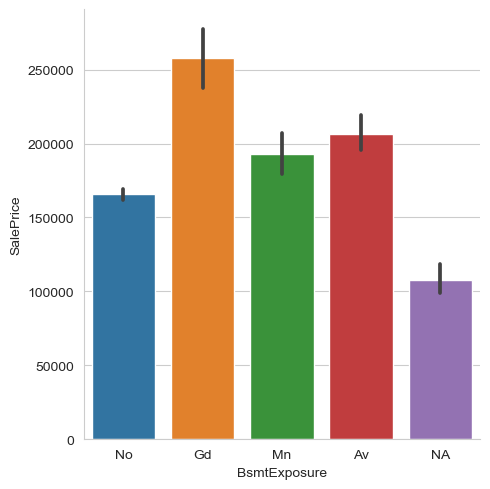

In [95]:
sns.catplot(X, x="BsmtExposure", y="SalePrice", kind="bar")

In [96]:
X["BsmtExposure_ordinal"] = X["BsmtExposure"].replace({"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0})
get_score_with_linear_regression(X, "BsmtExposure_ordinal")

Linear: [38814.87062875 45395.5620016  45043.9507495  39680.64815744
 52430.65277391]
Tree: [43277.84491397 56679.77695357 48683.40145416 40892.48814302
 53967.41499291]


(44273.1368622417, 48700.18529152775)

In [97]:
get_score_with_linear_regression_and_one_hot_encoding("BsmtExposure")

Linear: [38675.23421035 45502.02252234 44742.91982047 39379.5238013
 52177.12479669]
Tree: [43521.62653966 57888.54146503 45389.18977218 43366.21902512
 54800.01431522]


(44095.36503022818, 48993.11822344088)

### TotalBsmtSF  ✔

In [98]:
df["TotalBsmtSF"].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

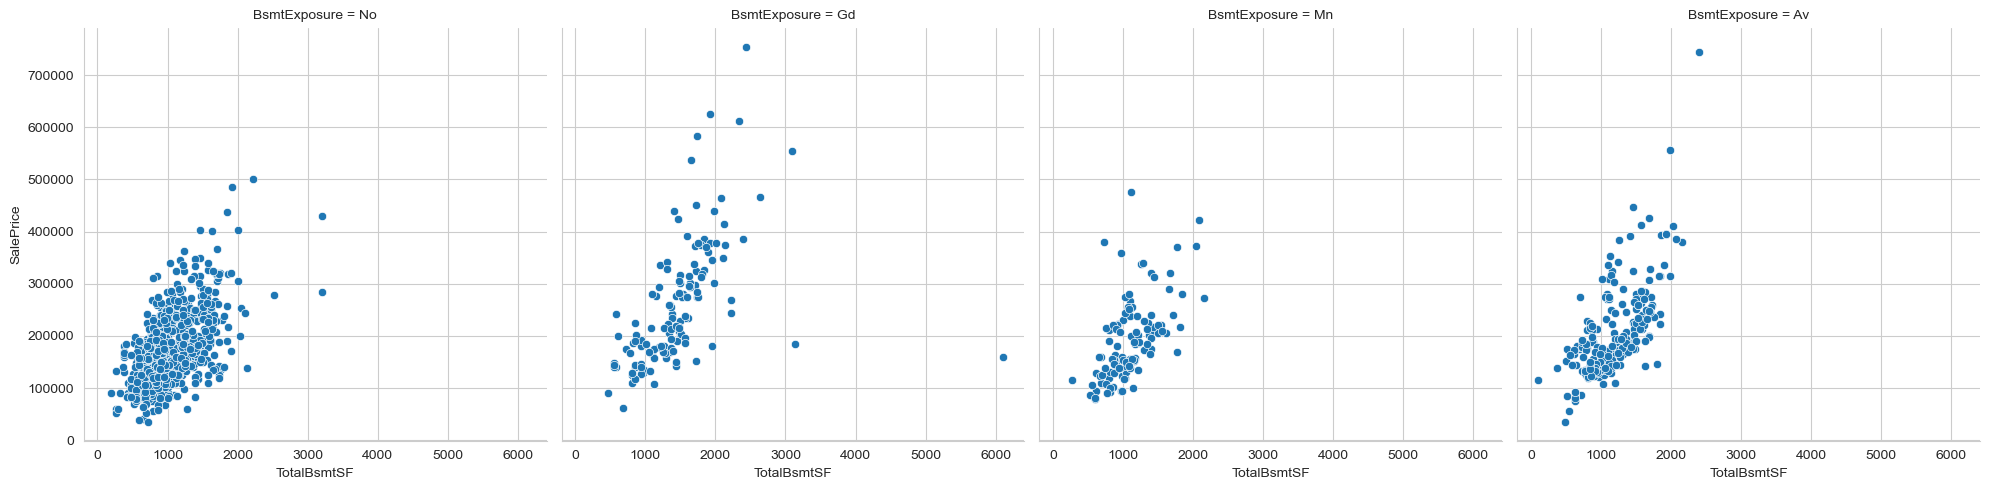

In [119]:
sns.relplot(df, x="TotalBsmtSF", y="SalePrice", col="BsmtExposure")

In [104]:
get_score_with_linear_regression(features="TotalBsmtSF")

Linear: [38027.50660639 43183.25446185 43548.98607082 37351.31685605
 57379.00080079]
Tree: [40335.83137733 49264.23232956 39385.15747811 41778.6092338
 45803.55276591]


(43898.012959181695, 43313.47663694082)

### TotalBsmtSF & BsmtCond

In [105]:
X = df.copy()
X["BsmtCond"].fillna("NA", inplace=True)
X["BsmtCond_ordinal"] = X["BsmtCond"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})

Score if using two features

In [107]:
get_score_with_linear_regression(X, features=["BsmtCond_ordinal", "TotalBsmtSF"])

Linear: [37973.41371123 43425.49660131 43567.29640181 37393.68373722
 57389.09892714]
Tree: [39509.12327461 54022.81695931 39331.7432108  39691.54589887
 48792.54426045]


(43949.79787574406, 44269.55472080672)

In [109]:
X["BsmtAreaCond"] = X["BsmtCond_ordinal"] * X["TotalBsmtSF"]
get_score_with_linear_regression(X, "BsmtAreaCond")

Linear: [37659.31292531 43049.54053704 43262.33098328 37569.53634264
 56704.726128  ]
Tree: [39893.65144896 49087.3487236  43384.56581289 40507.1845939
 49618.69639057]


(43649.089383255065, 44498.28939398603)

In [110]:
X["BsmtCond_ordinal"] = X["BsmtCond"].replace({"Ex": 1, "Gd": 2, "TA": 3, "Fa": 4, "Po": 5, "NA": 6})
X["BsmtAreaCond"] = X["TotalBsmtSF"] / X["BsmtCond_ordinal"]
get_score_with_linear_regression(X, "BsmtAreaCond")

Linear: [37793.42320424 43180.10906569 43420.07368317 37837.63840827
 56421.29203996]
Tree: [39039.89507433 46212.39578084 48105.88285448 41112.03696018
 45459.17927639]


(43730.50728026696, 43985.87798924347)

The score doesn't improve than using `TotalBsmtSF` alone.

### TotalBsmtSF & BsmtExposure

In [111]:
X = df.copy()
X["BsmtExposure"].fillna("NA", inplace=True)
X["BsmtExposure_ordinal"] = X["BsmtExposure"].replace({"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0})

In [112]:
X["BsmtAreaExposure"] = X["TotalBsmtSF"] * X["BsmtExposure_ordinal"]
get_score_with_linear_regression(X, "BsmtAreaExposure")

Linear: [37620.49033434 43370.48439186 42556.53333782 37471.50519678
 56937.81688167]
Tree: [44504.33220416 54228.58783939 39913.43411084 42145.07048556
 42096.08472797]


(43591.3660284942, 44577.501873586065)

In [114]:
X["BsmtExposure_ordinal"] = X["BsmtExposure"].replace({"Gd": 1, "Av": 2, "Mn": 3, "No": 4, "NA": 5})
X["BsmtAreaExposure"] = X["TotalBsmtSF"] / X["BsmtExposure_ordinal"]

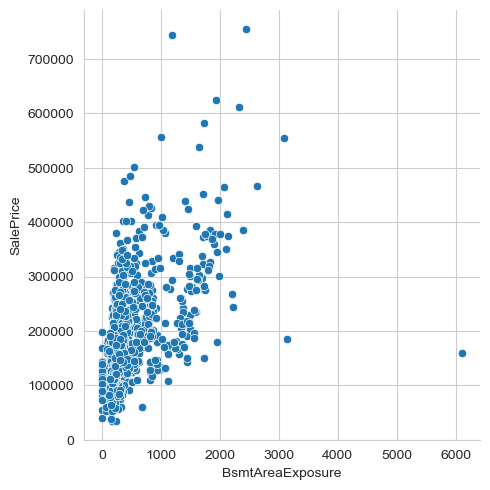

In [118]:
sns.relplot(X, x="BsmtAreaExposure", y="SalePrice")

In [115]:
get_score_with_linear_regression(X, "BsmtAreaExposure")

Linear: [37823.17241077 43599.42842193 42983.21572088 37800.14734363
 57902.98513762]
Tree: [42194.02050537 50283.67134735 45297.59468062 38589.30871825
 46073.19475079]


(44021.78980696729, 44487.558000475474)

The score doesn't improve than using `TotalBsmtSF` alone.

### BsmtFinType1

In [120]:
X = df.copy()
X["BsmtFinType1"].fillna("NA", inplace=True)

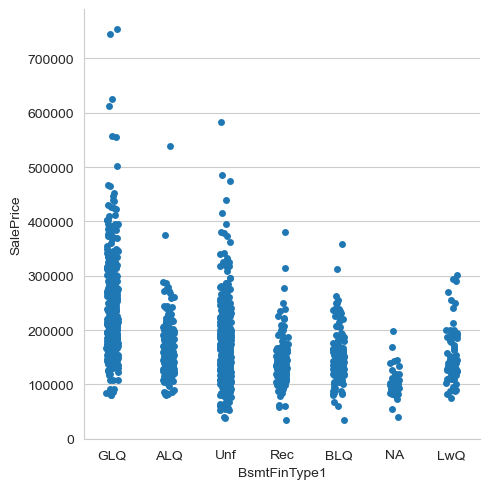

In [121]:
sns.catplot(X, x="BsmtFinType1", y="SalePrice")

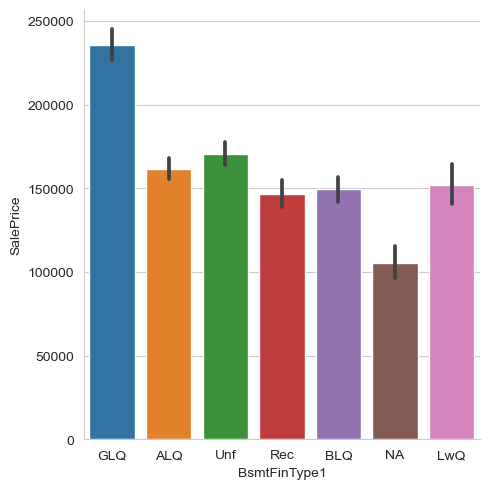

In [122]:
sns.catplot(X, x="BsmtFinType1", y="SalePrice", kind="bar")

In [123]:
get_score_with_linear_regression_and_one_hot_encoding("BsmtFinType1")

Linear: [40092.69394477 45516.64433355 45872.67034811 39125.75723508
 52658.49857548]
Tree: [43957.39727535 56701.17429388 49740.61730942 39804.06551429
 54593.60086215]


(44653.252887398616, 48959.37105101634)

### Heating

In [124]:
X = df.copy()
X["Heating"].fillna("NA", inplace=True)

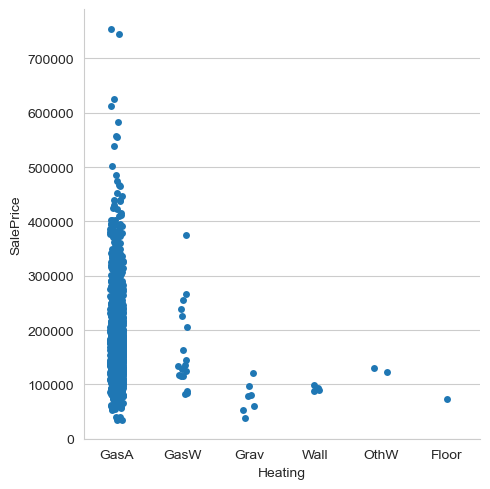

In [125]:
sns.catplot(X, x="Heating", y="SalePrice")

In [126]:
get_score_with_linear_regression_and_one_hot_encoding("Heating")

Linear: [40669.3914343  46815.15686029 47174.97790821 41909.85604039
 54787.33139937]
Tree: [43409.46580035 54690.29115802 54516.61624334 41422.31976324
 54618.53569904]


(46271.34272851087, 49731.44573279848)

### CentralAir

In [131]:
df["CentralAir"].describe()

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object

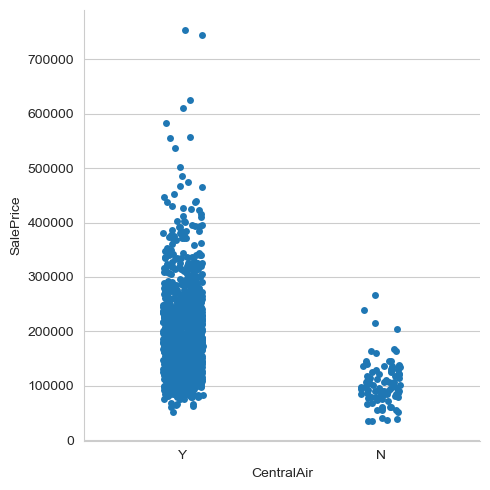

In [132]:
sns.catplot(df, x="CentralAir", y="SalePrice")

In [138]:
X = df.copy()
X["CentralAir"].replace({"Y": 1, "N": 0}, inplace=True)
get_score_with_linear_regression(X, "CentralAir")

Linear: [40569.27339695 46798.66612525 47159.11895632 41742.90397109
 54679.38593594]
Tree: [42186.54413695 54328.41743514 45540.49785954 43546.21439738
 54498.19902721]


(46189.86967711071, 48019.97457124316)

In [139]:
get_score_with_linear_regression_and_one_hot_encoding("CentralAir")

Linear: [40569.27339695 46798.66612525 47159.11895632 41742.90397109
 54679.38593594]
Tree: [43408.7479819  58559.08766185 55191.37673351 41955.72854812
 53627.36840732]


(46189.869677110735, 50548.461866538186)

### Electrical

In [140]:
df["Electrical"].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [142]:
X = df.copy()
X["Electrical"].fillna("SBrkr", inplace=True)

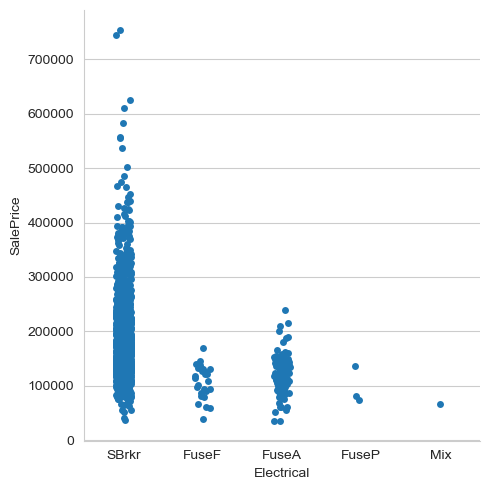

In [143]:
sns.catplot(X, x="Electrical", y="SalePrice")

In [145]:
get_score_with_linear_regression_and_one_hot_encoding("Electrical")

Linear: [40822.56426397 46863.6287078  47166.25502461 41857.69458709
 54801.49649247]
Tree: [44389.22554127 57533.56562825 45593.56874292 43157.40845146
 50769.69590006]


(46302.32781518975, 48288.69285279496)

### KitchenQual ✔

In [150]:
df["KitchenQual"].describe()

count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object

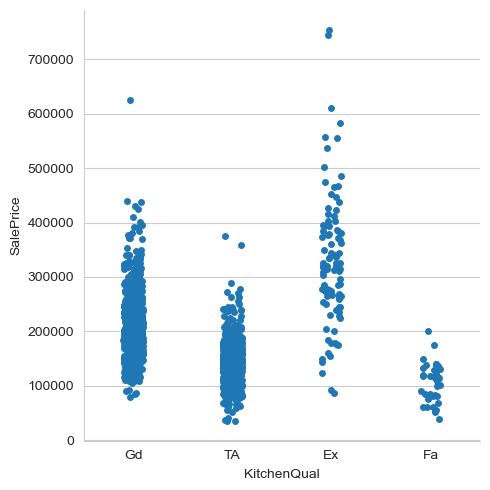

In [149]:
sns.catplot(df, x="KitchenQual", y="SalePrice")

In [151]:
X = df.copy()
X["KitchenQual_ordinal"] = X["KitchenQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1})

In [152]:
get_score_with_linear_regression(X, "KitchenQual_ordinal")

Linear: [36549.06845067 42585.78592012 43530.17784263 37624.31561116
 50580.7564153 ]
Tree: [41550.85875289 58048.86360884 48840.3694213  44633.93485492
 47625.35828409]


(42174.02084797411, 48139.87698440904)

In [153]:
get_score_with_linear_regression_and_one_hot_encoding("KitchenQual")

Linear: [34519.57354651 41960.14997411 41774.94570891 35323.52280571
 49595.60137252]
Tree: [41381.76978482 54641.77169447 48680.9263257  43962.28120604
 49454.91684193]


(40634.758681551335, 47624.33317059345)

### Functional

In [154]:
df["Functional"].describe()

count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object

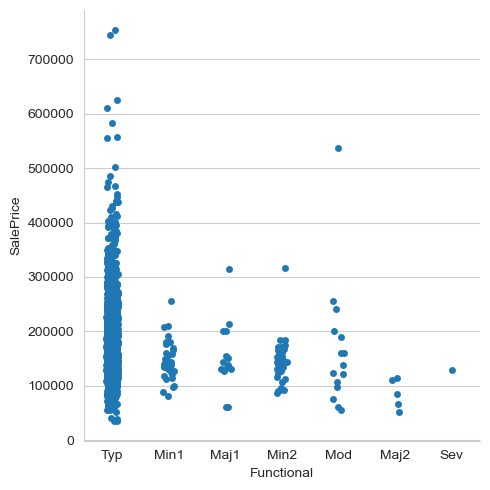

In [155]:
sns.catplot(df, x="Functional", y="SalePrice")

In [156]:
X = df.copy()
X["Functional_ordinal"] = X["Functional"].replace({
    "Typ": 0,
    "Min1": -1,
    "Min2": -2,
    "Mod": -3,
    "Maj1": -4,
    "Maj2": -5,
    "Sev": -6,
    "Sal": -7
})

In [157]:
get_score_with_linear_regression(X, "Functional_ordinal")

Linear: [40114.66827199 46494.37019818 46473.49766365 41515.22084508
 54065.11961204]
Tree: [43543.34296356 57780.58926347 46220.53199774 41173.60735994
 54838.01553189]


(45732.57531818921, 48711.21742331973)

In [158]:
get_score_with_linear_regression_and_one_hot_encoding("Functional")

Linear: [40040.70206471 46544.99327113 46654.22148363 41434.82122836
 54022.30717771]
Tree: [43832.8359767  58903.87376466 48547.16580088 40674.27821762
 54278.33702212]


(45739.40904510817, 49247.298156394696)

### Fireplaces

In [159]:
df["Fireplaces"].describe()

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

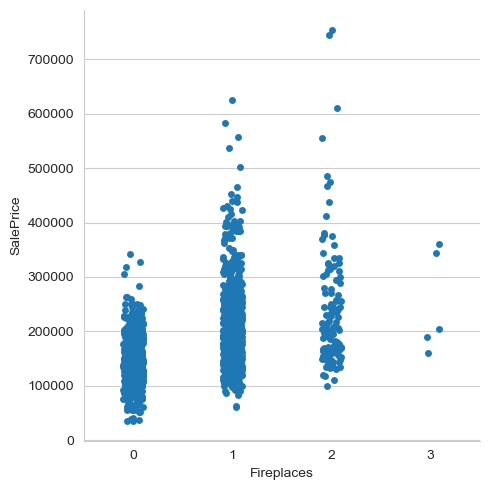

In [161]:
sns.catplot(df, x="Fireplaces", y="SalePrice")

In [164]:
get_score_with_linear_regression(features="Fireplaces")

Linear: [39978.23322996 45496.97251359 47041.21816529 40874.50814532
 53382.3328073 ]
Tree: [42567.35460517 55502.68648962 46121.37884768 40662.84862923
 53332.81119446]


(45354.65297229161, 47637.41595323349)

### FireplaceQu ✔

In [165]:
df["FireplaceQu"].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [166]:
X = df.copy()
X["FireplaceQu"].fillna("NA", inplace=True)

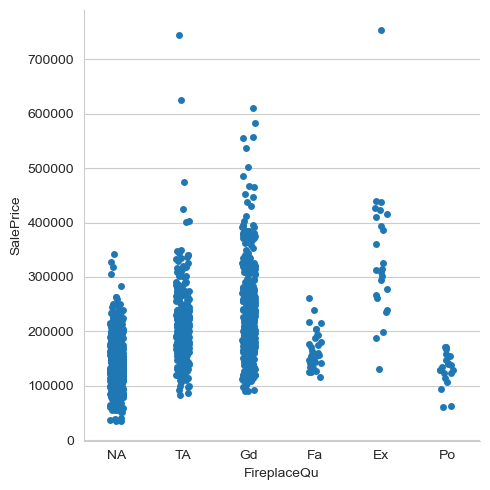

In [167]:
sns.catplot(X, x="FireplaceQu", y="SalePrice")

In [168]:
get_score_with_linear_regression_and_one_hot_encoding("FireplaceQu")

Linear: [39096.19910091 43200.23086749 43989.72312252 40298.00671948
 53071.87897195]
Tree: [45756.79068283 49345.33058949 49712.34154841 43283.71990604
 54761.14906524]


(43931.20775647023, 48571.86635840196)

In [169]:
X["FireplaceQu_ordinal"] = X["FireplaceQu"].replace({
    "NA": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5,
})
get_score_with_linear_regression(X, "FireplaceQu_ordinal")

Linear: [39358.57081829 44969.556896   46058.04126066 40939.06133153
 52653.1061326 ]
Tree: [41996.03664825 51314.55257093 43909.3273847  43431.75696581
 52978.42192931]


(44795.66728781597, 46726.01909979881)

### GarageYrBlt

In [170]:
df["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [171]:
X = df.copy()
X["GarageYrBlt"].fillna(0, inplace=True)

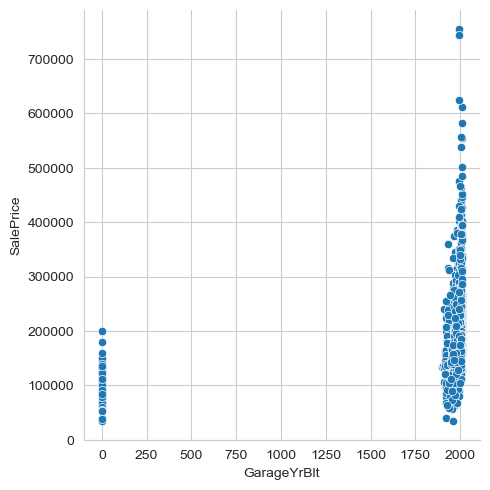

In [172]:
sns.relplot(X, x="GarageYrBlt", y="SalePrice")

In [173]:
get_score_with_linear_regression(X, "GarageYrBlt")

Linear: [40390.94023212 46753.86336722 47302.64107578 41868.5293211
 54480.97745078]
Tree: [42838.08914785 59924.22877279 45743.18473135 41650.21399249
 53318.47701419]


(46159.390289400835, 48694.8387317336)

### GarageArea

In [174]:
df["GarageArea"].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

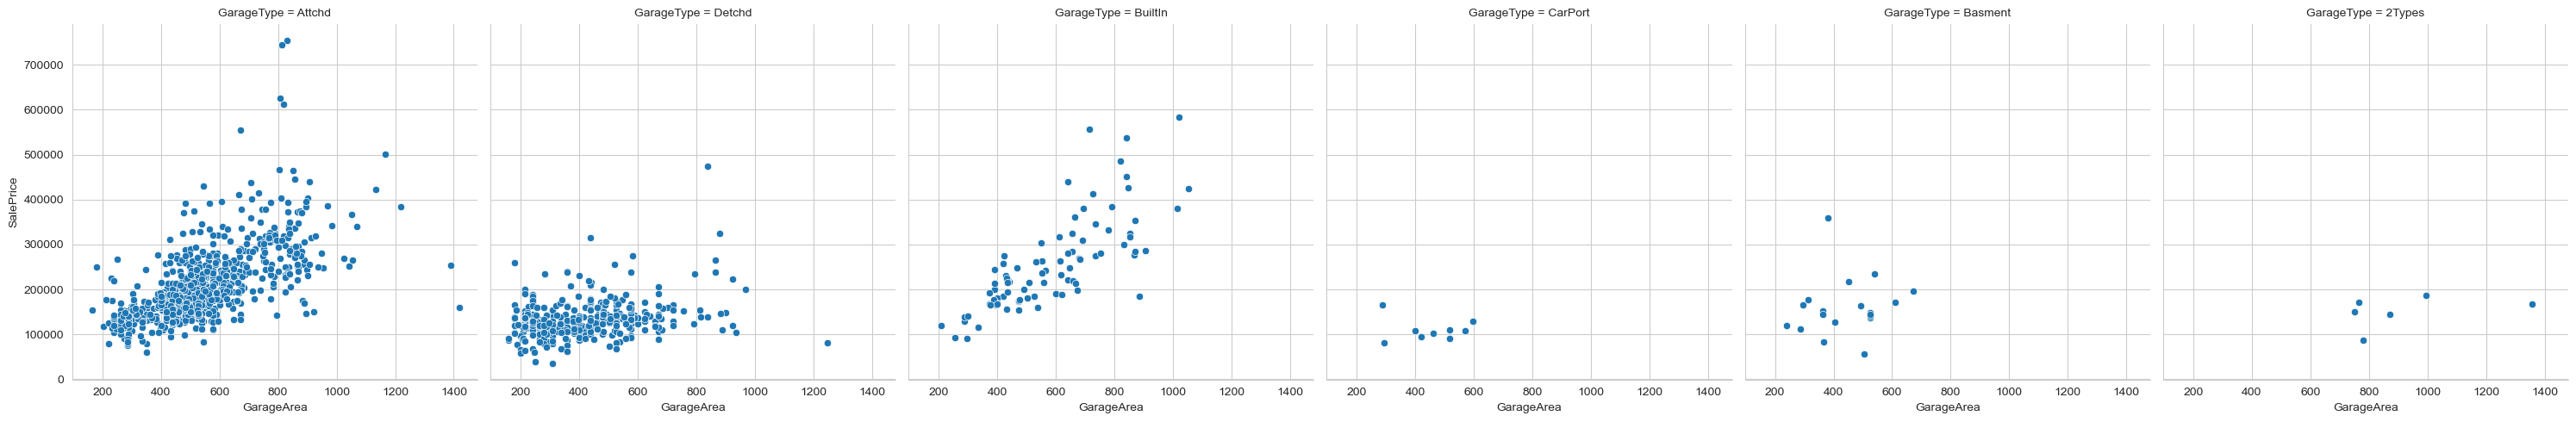

In [177]:
sns.relplot(df, x="GarageArea", y="SalePrice", col="GarageType")

In [178]:
get_score_with_linear_regression(features="GarageArea")

Linear: [36916.64501976 44406.49159118 45728.95531673 40464.49775169
 54016.21994679]
Tree: [45493.03242203 61411.12529089 45436.32196287 42430.08446139
 62024.34224224]


(44306.56192522969, 51358.981275883736)

### PoolArea

In [179]:
df["PoolArea"].describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

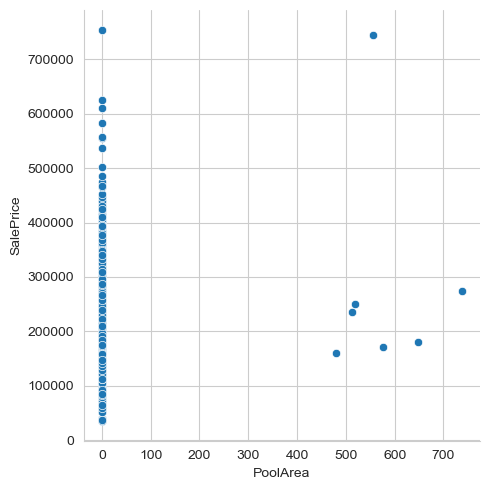

In [180]:
sns.relplot(df, x="PoolArea", y="SalePrice")

### Fence

In [181]:
df["Fence"].describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

In [182]:
X = df.copy()
X["Fence"].fillna("NA", inplace=True)

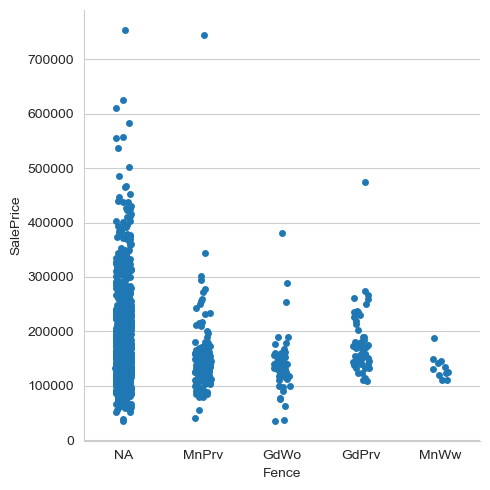

In [183]:
sns.catplot(X, x="Fence", y="SalePrice")

In [189]:
get_score_with_linear_regression_and_one_hot_encoding(feature="Fence", df=X)

Linear: [40791.52721305 46878.19743256 47227.71414019 42102.74559504
 54826.68105675]
Tree: [41841.02331837 60287.77001121 53024.50883234 41195.20914441
 54673.85485193]


(46365.37308751671, 50204.47323165402)